# Clustering con Python

### Importar el dataset

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('../datasets/wine/winequality-red.csv', sep = ';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
import matplotlib.pyplot as plt

(array([  10.,    0.,   53.,    0.,  681.,    0.,  638.,    0.,  199.,   18.]),
 array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ]),
 <a list of 10 Patch objects>)

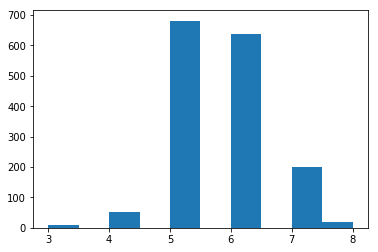

In [8]:
plt.hist(df['quality'])

In [9]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [11]:
df_norm = (df - df.min()) / (df.max() - df.min())

df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


### Clustering jerarquico con scikit-learn

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
clus = AgglomerativeClustering(n_clusters = 6, linkage = 'ward').fit(df_norm)

In [30]:
md_h = pd.Series(clus.labels_)

Text(0,0.5,'Número de vinos del cluster')

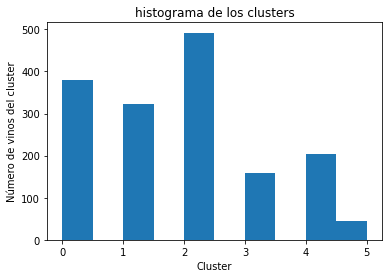

In [31]:
plt.hist(md_h)

plt.title('histograma de los clusters')

plt.xlabel('Cluster')

plt.ylabel('Número de vinos del cluster')

In [17]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ..., 
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
Z = linkage(df_norm, 'ward')

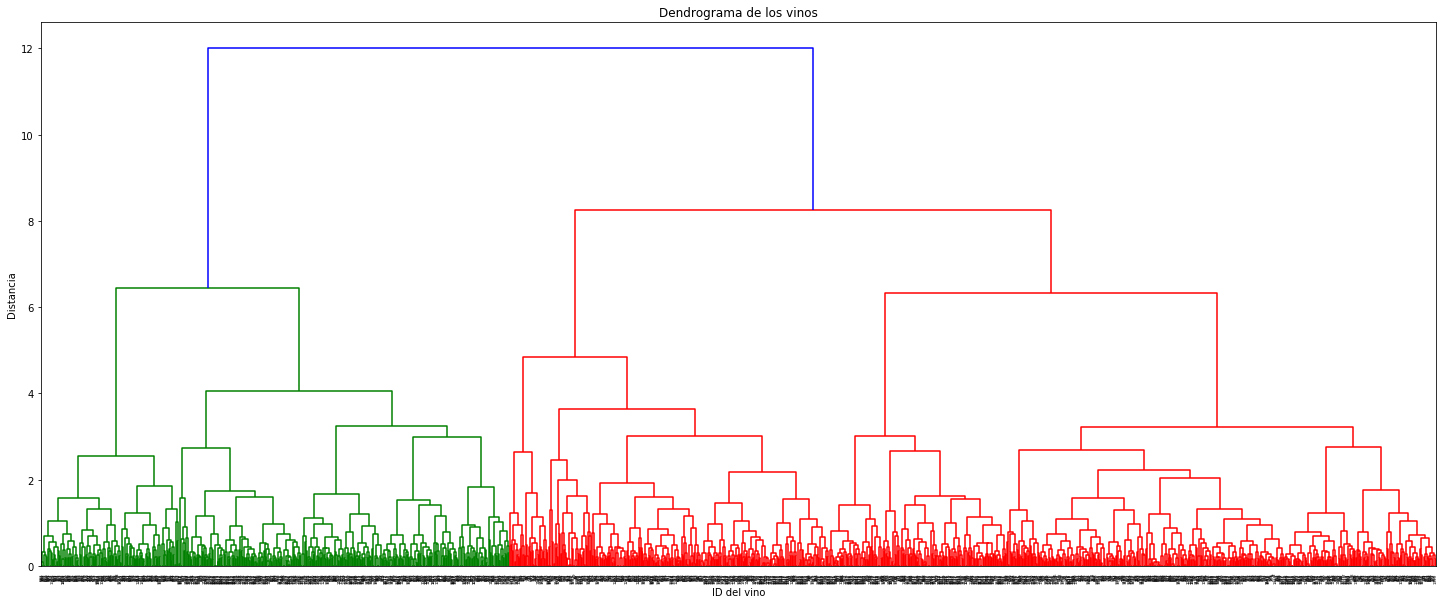

In [25]:
plt.figure(figsize = (25, 10))

plt.title('Dendrograma de los vinos')

plt.xlabel('ID del vino')

plt.ylabel('Distancia')

dendrogram(Z, leaf_rotation = 90., leaf_font_size = 4.)

plt.show()

### K-means

In [26]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [27]:
model = KMeans(n_clusters = 6)

model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
model.labels_

array([1, 1, 1, ..., 3, 1, 5], dtype=int32)

In [29]:
md_k = pd.Series(model.labels_)

In [32]:
df_norm['clust_h'] = md_h

df_norm['clust_k'] = md_k

In [33]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1


(array([ 217.,    0.,  349.,    0.,  268.,    0.,  216.,    0.,  301.,  248.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

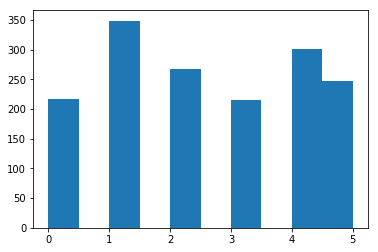

In [34]:
plt.hist(md_k)

In [35]:
model.cluster_centers_

array([[ 0.59079972,  0.209346  ,  0.54105991,  0.13575532,  0.17599225,
         0.14370092,  0.09863054,  0.66250161,  0.3140172 ,  0.25351141,
         0.28136595,  0.54009217],
       [ 0.23739128,  0.38900773,  0.06659026,  0.09387879,  0.12084133,
         0.16608822,  0.10607794,  0.48033399,  0.52412968,  0.1521713 ,
         0.23669091,  0.4217765 ],
       [ 0.32007   ,  0.27698835,  0.31126866,  0.1640002 ,  0.12864102,
         0.40711057,  0.31286588,  0.54193241,  0.42872253,  0.19083475,
         0.21961347,  0.45447761],
       [ 0.17551622,  0.31760528,  0.09634259,  0.09370244,  0.09543684,
         0.24771779,  0.12411661,  0.31965859,  0.57706328,  0.18743069,
         0.49824311,  0.61759259],
       [ 0.32428777,  0.27763619,  0.26418605,  0.08744823,  0.13126529,
         0.13939451,  0.1284059 ,  0.51725038,  0.4214822 ,  0.18246563,
         0.21004344,  0.48837209],
       [ 0.37899657,  0.1574652 ,  0.43907258,  0.10784909,  0.10681108,
         0.16645843,  

In [36]:
model.inertia_

188.56272427713898

### Interpretación final

In [37]:
df_norm.groupby('clust_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.590800,0.209346,0.541060,0.135755,0.175992,0.143701,0.098631,0.662502,0.314017,0.253511,0.281366,0.540092,2.603687
1,0.237391,0.389008,0.066590,0.093879,0.120841,0.166088,0.106078,0.480334,0.524130,0.152171,0.236691,0.421777,2.143266
2,0.320070,0.276988,0.311269,0.164000,0.128641,0.407111,0.312866,0.541932,0.428723,0.190835,0.219613,0.454478,1.044776
3,0.175516,0.317605,0.096343,0.093702,0.095437,0.247718,0.124117,0.319659,0.577063,0.187431,0.498243,0.617593,3.412037
4,0.324288,0.277636,0.264186,0.087448,0.131265,0.139395,0.128406,0.517250,0.421482,0.182466,0.210043,0.488372,1.551495
5,0.378997,0.157465,0.439073,0.107849,0.106811,0.166458,0.084350,0.413194,0.409639,0.240028,0.501179,0.711290,0.076613
